# Comparison of Walmart Data, CPI Data, and Unemployment Claims Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [103]:
# sales = name of main dataframe AFTER it has been cleaned up & merged
# cpi = inflation table
# joblessclaims = unemployment table
# train = unfiltered Walmart Sales Data

In [3]:
# Read cpi.csv
CPIColNames = ['Date', 'CPI']
cpiRaw = pd.read_csv('cpi.csv', parse_dates=['Date'], header=None, index_col = 0, names=CPIColNames)


# Read Jobless Claims Data csv
JobColNames = ['Date', 'Claims']
joblessclaims = pd.read_csv('initial_joblessclaims.csv', parse_dates=True, index_col = 0, header = None, names=JobColNames)


# Read the Walmart Sales Data csv
train = pd.read_csv('train.csv')



In [4]:
# Slice out the selected CPI months from February 2010 through October 2012
cpi = cpiRaw.loc['Feb-10':'Oct-12', :]
cpi.reset_index(inplace=True)

# Slice only the Jobless Claims dates from from February 2010 through October 2012
JoblessClaims = joblessclaims.loc['06/2/2010':'27/10/2012', :]
JoblessClaims = pd.DataFrame(JoblessClaims)


# Change all data types to Datetime and Float 

In [5]:
# Slice out store one's information 
train_subset = train[:14019]

In [6]:
# Convert to JoblessClaims DateTime
JoblessClaims.reset_index(inplace=True)
JoblessClaims['Date'] = pd.to_datetime(JoblessClaims['Date'],dayfirst=True)

# Convert train to Datetime
train_subset["datetime_Date"] = pd.to_datetime(train_subset.Date)


# Convert cpi to Datetime
cpi["cpi_date"] = pd.to_datetime(cpi.Date, format="%b-%y")

C:\Users\Darrell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Darrell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# Check JoblessClaims data types
JoblessClaims.dtypes

Date      datetime64[ns]
Claims            object
dtype: object

In [8]:
# Check cpi data types
cpi.dtypes

Date                object
CPI                 object
cpi_date    datetime64[ns]
dtype: object

In [9]:
# Check train data types
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [10]:
# Confirm we have the right datetime data type
train_subset.dtypes

Store                     int64
Dept                      int64
Date                     object
Weekly_Sales            float64
IsHoliday                  bool
datetime_Date    datetime64[ns]
dtype: object

In [11]:
# Format Jobless Claims dates to match train Dataframe
JoblessClaims.Date + dt.timedelta(days=-1)
JoblessClaims["Date_sub1"] = JoblessClaims.Date + dt.timedelta(days=-1)
JoblessClaims["jobless_date"] = JoblessClaims.apply(lambda x: x["Date_sub1"].replace(day=1),axis=1)

In [12]:
# Add a column that formats date so we can merge the three dataframes
train_subset['train_date'] = train_subset.apply(lambda x: x["datetime_Date"].replace(day=1),axis=1)
train_subset.head()

C:\Users\Darrell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Store,Dept,Date,Weekly_Sales,IsHoliday,datetime_Date,train_date
0,1,1,2/5/2010,24924.50,False,2010-02-05,2010-02-01
1,1,1,2/12/2010,46039.49,True,2010-02-12,2010-02-01
2,1,1,2/19/2010,41595.55,False,2010-02-19,2010-02-01
3,1,1,2/26/2010,19403.54,False,2010-02-26,2010-02-01
4,1,1,3/5/2010,21827.90,False,2010-03-05,2010-03-01


# Combine the three Dataframes

In [13]:
# Merge train_subset with cpi Dataframes
merge1 = pd.merge(train_subset, cpi, how='inner', on=None, left_on='train_date', right_on='cpi_date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)


In [14]:
# Merge merge1 with JoblessCLaims Dataframes
merge2 = pd.merge(merge1, JoblessClaims, how='left', on=None, left_on='datetime_Date', right_on='Date_sub1',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merge2.head()

,Store,Dept,Date_x,Weekly_Sales,IsHoliday,datetime_Date,train_date,Date_y,CPI,cpi_date,Date,Claims,Date_sub1,jobless_date
0,1,1,2/5/2010,24924.50,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,2010-02-06,512.463,2010-02-05,2010-02-01
1,1,2,2/5/2010,50605.27,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,2010-02-06,512.463,2010-02-05,2010-02-01
2,1,3,2/5/2010,13740.12,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,2010-02-06,512.463,2010-02-05,2010-02-01
3,1,4,2/5/2010,39954.04,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,2010-02-06,512.463,2010-02-05,2010-02-01
4,1,5,2/5/2010,32229.38,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,2010-02-06,512.463,2010-02-05,2010-02-01


In [15]:
# Clean up and rename the second merged table
cleanDf = merge2.drop(columns=['Date_x', 'train_date', 'Date_y', 'cpi_date', 'Date', 'Date_sub1', 'jobless_date'])
cleanDf.head()

,Store,Dept,Weekly_Sales,IsHoliday,datetime_Date,CPI,Claims
0,1,1,24924.50,False,2010-02-05,173.419,512.463
1,1,2,50605.27,False,2010-02-05,173.419,512.463
2,1,3,13740.12,False,2010-02-05,173.419,512.463
3,1,4,39954.04,False,2010-02-05,173.419,512.463
4,1,5,32229.38,False,2010-02-05,173.419,512.463


In [16]:
# Change CPI and Claim datatypes to numeric
cleanDf['CPI']=pd.to_numeric(cleanDf['CPI'])
cleanDf['Claims']=pd.to_numeric(cleanDf['Claims'])
cleanDf.dtypes

Store                     int64
Dept                      int64
Weekly_Sales            float64
IsHoliday                  bool
datetime_Date    datetime64[ns]
CPI                     float64
Claims                  float64
dtype: object

In [17]:
# Slice out store one's information
store1 = cleanDf.iloc[:13993, :]
store1.head()

,Store,Dept,Weekly_Sales,IsHoliday,datetime_Date,CPI,Claims
0,1,1,24924.50,False,2010-02-05,173.419,512.463
1,1,2,50605.27,False,2010-02-05,173.419,512.463
2,1,3,13740.12,False,2010-02-05,173.419,512.463
3,1,4,39954.04,False,2010-02-05,173.419,512.463
4,1,5,32229.38,False,2010-02-05,173.419,512.463


# Visualize the Data



## Sales per Department

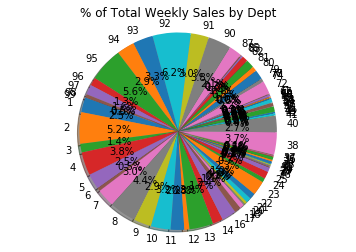

In [36]:
# Create pie chart characteristics
dept = cleanDf.groupby("Dept")
deptSales = dept["Weekly_Sales"].sum()
labels = deptSales.index
#chartColors = [colorDict[i] for i in labels]
explode = [0, 0, .1]

plt.pie(deptSales, startangle = 160, labels=labels, colors = None,autopct = "%1.1f%%", shadow = True,) 
plt.title("% of Total Weekly Sales by Dept")
#plt.legend(labels, loc="best")
plt.axis("equal")
plt.show()

## Compare Sales With Unemployment Claims

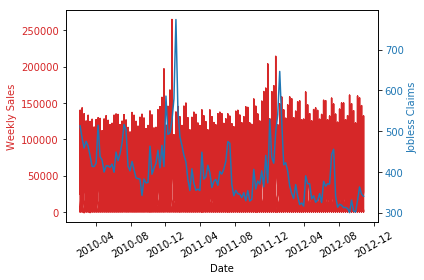

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color=color)
ax1.plot(cleanDf['datetime_Date'], cleanDf['Weekly_Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Jobless Claims', color=color)  # we already handled the x-label with ax1
ax2.plot(cleanDf['datetime_Date'], cleanDf['Claims'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Compare dates of holidays with sales

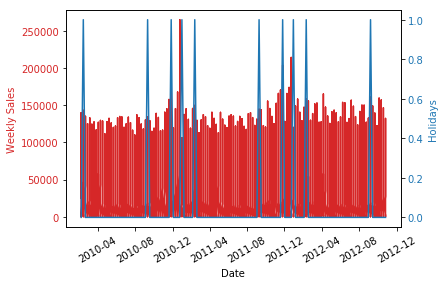

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color=color)
ax1.plot(cleanDf['datetime_Date'], cleanDf['Weekly_Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Holidays', color=color)  # we already handled the x-label with ax1
ax2.plot(cleanDf['datetime_Date'], cleanDf['IsHoliday'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



## Compare Sales With Consumer Price Index

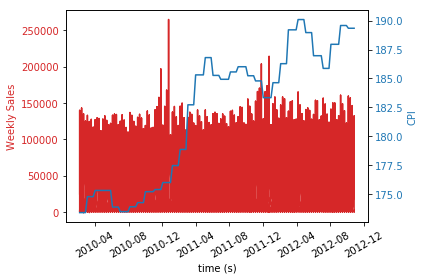

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Weekly Sales', color=color)
ax1.plot(cleanDf['datetime_Date'], cleanDf['Weekly_Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CPI', color=color)  # we already handled the x-label with ax1
ax2.plot(cleanDf['datetime_Date'], cleanDf['CPI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# View Sales for 2010, 2011, & 2012 

In [23]:
# Slice data for 2010
mask = (cleanDf['datetime_Date'] > '2010-02-04') & (cleanDf['datetime_Date'] <= '2010-12-31')

cleanDf_2010 = cleanDf.loc[mask]

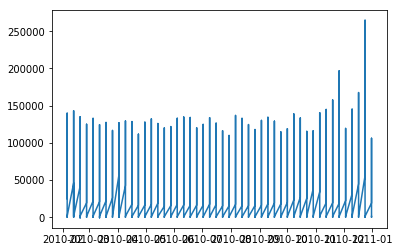

In [24]:
# Plot 2010 Data
#plt.ylim(bottom=cpi['CPI'].min()-5, top=cpi['CPI'].max() + 5)  
#plt.plot_date(cpi['cpi_date'],cpi['CPI'], fmt='o', tz=None, xdate=True, ydate=False, data=None)
plt.plot(cleanDf_2010['datetime_Date'],cleanDf_2010['Weekly_Sales'])

plt.show()

In [25]:
# Slice Data for 2011
mask = (cleanDf['datetime_Date'] > '2011-01-07') & (cleanDf['datetime_Date'] <= '2011-12-30')

cleanDf_2011 = cleanDf.loc[mask]
cleanDf_2011.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,datetime_Date,CPI,Claims
4829,1,1,17359.70,False,2011-01-14,177.48,549.688
4830,1,2,39857.40,False,2011-01-14,177.48,549.688
4831,1,3,13275.87,False,2011-01-14,177.48,549.688
4832,1,4,34393.95,False,2011-01-14,177.48,549.688
4833,1,5,17445.37,False,2011-01-14,177.48,549.688
4834,1,6,2355.86,False,2011-01-14,177.48,549.688
4835,1,7,10774.06,False,2011-01-14,177.48,549.688
4836,1,8,34228.30,False,2011-01-14,177.48,549.688
4837,1,9,13215.27,False,2011-01-14,177.48,549.688
4838,1,10,23058.41,False,2011-01-14,177.48,549.688


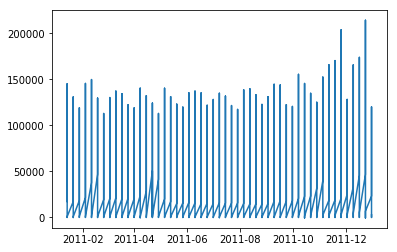

In [26]:
# Plot 2011 Data
#plt.ylim(bottom=cpi['CPI'].min()-5, top=cpi['CPI'].max() + 5)  
#plt.plot_date(cpi['cpi_date'],cpi['CPI'], fmt='o', tz=None, xdate=True, ydate=False, data=None)
plt.plot(cleanDf_2011['datetime_Date'],cleanDf_2011['Weekly_Sales'])

plt.show()

In [27]:
# Slice Data for 2012
mask = (cleanDf['datetime_Date'] > '2012-01-06') & (cleanDf['datetime_Date'] <= '2012-10-26')

cleanDf_2012 = cleanDf.loc[mask]
cleanDf_2012.head(10)

,Store,Dept,Weekly_Sales,IsHoliday,datetime_Date,CPI,Claims
9933,1,1,16894.40,False,2012-01-13,184.636,525.422
9934,1,2,43353.09,False,2012-01-13,184.636,525.422
9935,1,3,13822.49,False,2012-01-13,184.636,525.422
9936,1,4,36582.36,False,2012-01-13,184.636,525.422
9937,1,5,19281.61,False,2012-01-13,184.636,525.422
9938,1,6,2460.92,False,2012-01-13,184.636,525.422
9939,1,7,9194.61,False,2012-01-13,184.636,525.422
9940,1,8,34033.89,False,2012-01-13,184.636,525.422
9941,1,9,15416.12,False,2012-01-13,184.636,525.422
9942,1,10,23995.69,False,2012-01-13,184.636,525.422


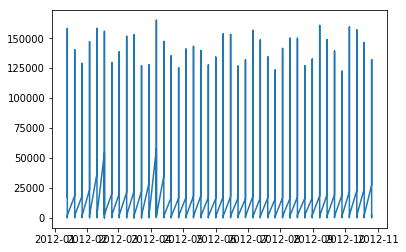

In [28]:
# Plot Data for 2012
plt.plot(cleanDf_2012['datetime_Date'],cleanDf_2012['Weekly_Sales'])

plt.show()